# Linear Regression

(100, 1) (100, 1)


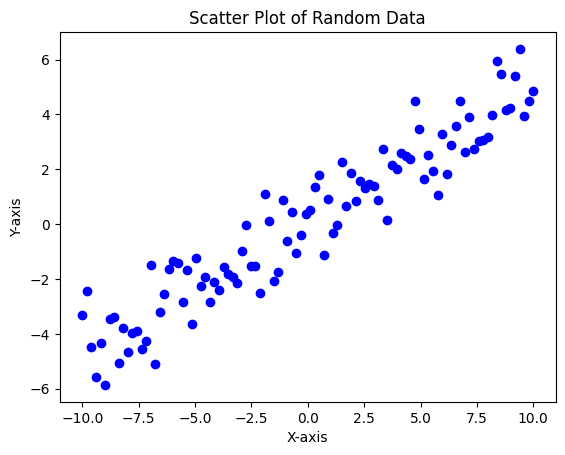

Initial Cost: 5.083490927782869


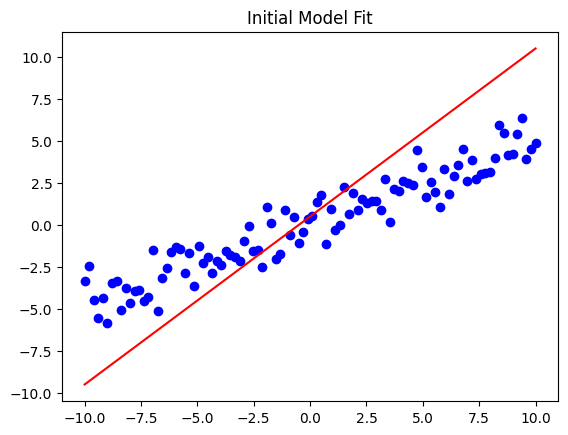

Final Parameters: [[0.4627222  0.49964182]]
Final Cost: 0.520664276670867


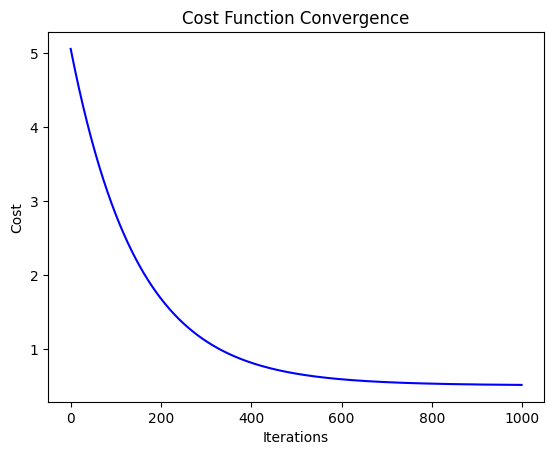

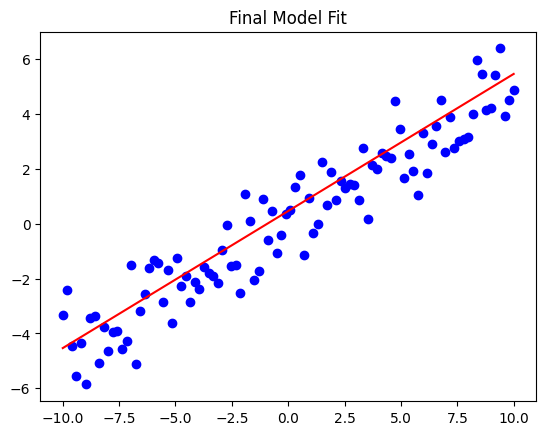

In [24]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)
Y = np.random.randn(100) + 0.5 * X
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

print(X.shape, Y.shape)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.title('Scatter Plot of Random Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

def hypothesis(theta, x):
    return X.dot(theta.T)

Theta = np.array([0.5, 1])
Theta = Theta.reshape(1, -1)
X = np.concatenate((np.ones((100, 1)), X), axis=1)

initial_predictions = hypothesis(Theta, X)

# print(initial_predictions[:5])
# print(initial_predictions.shape)

def cost_function(X, Y, theta):
    m = len(Y)
    predictions = hypothesis(theta, X)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - Y))
    return cost

initial_cost = cost_function(X, Y, Theta)
print(f'Initial Cost: {initial_cost}')

# Initial model visualization
plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
plt.plot(X[:, 1], initial_predictions, color='red', label='Initial Model')
plt.title('Initial Model Fit')
plt.show()


# Gradient Descent
def gradient_descent(X, Y, theta, learning_rate=0.0001, iterations=100):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = hypothesis(theta, X)
        errors = predictions - Y
        theta -= (learning_rate / m) * (X.T.dot(errors)).T
        cost_history[i] = cost_function(X, Y, theta)

    return theta, cost_history

learning_rate = 0.0001
iterations = 1000
Theta_final, cost_history = gradient_descent(X, Y, Theta, learning_rate, iterations)
print(f'Final Parameters: {Theta_final}')
final_cost = cost_function(X, Y, Theta_final)
print(f'Final Cost: {final_cost}')

# Cost History
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Trained model visualization
final_predictions = hypothesis(Theta_final, X)
plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
plt.plot(X[:, 1], final_predictions, color='red', label='Final Model')
plt.title('Final Model Fit')
plt.show()

# Using SKlearn

SKlearn Coefficients: Intercept = [0.10829111], Slope = [[0.48248191]]
Mean Squared Error (SKlearn): 0.905693450972532


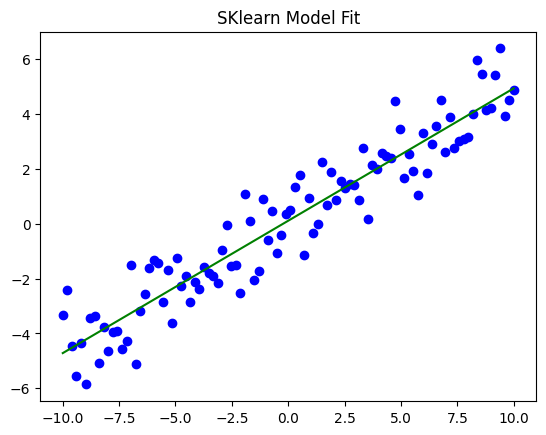

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X[:, 1].reshape(-1, 1), Y)
print(f'SKlearn Coefficients: Intercept = {lr.intercept_}, Slope = {lr.coef_}')

MSE = mean_squared_error(Y, lr.predict(X[:, 1].reshape(-1, 1)))
print(f'Mean Squared Error (SKlearn): {MSE}')

# Visualization of SKlearn model
plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
plt.plot(X[:, 1], lr.predict(X[:, 1].reshape(-1, 1)), color='green', label='SKlearn Model')
plt.title('SKlearn Model Fit')
plt.show()